# Projet :

In [180]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [181]:
crimes = pd.read_csv('crimes-et-delits-enregistres-par-les-forces-de-securite-en-2016-par-departement.csv', sep= ';')

In [182]:
revenu = pd.read_csv('Classeur1.csv', sep=';')

In [183]:
revenu = revenu.astype({'Revenu fiscal moyen':'float64'})

In [184]:
coleur = pd.read_csv('Classeur2.csv',sep=';')

In [185]:
crimes.head()

,Département,Libellé Département,Population,Nombre de logements,"Vols avec armes (armes à feu, armes blanches ou par destination)",Vols violents sans arme,Vols sans violence contre des personnes,Coups et blessures volontaires (sur personnes de 15 ans ou plus),Cambriolages de logement,Vols de véhicules (automobiles ou deux roues motorisés),Vols dans les véhicules,Vols d'accessoires sur véhicules,geom,geo_point_2d
0,22,COTES D'ARMOR,597397,354438,19.0,206.0,3550,1264,1310,630,1230.0,447,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-2...","48.44067349, -2.86467071882"
1,63,PUY DE DOME,644216,371859,44.0,359.0,4526,1494,2884,1844,2011.0,820,"{""type"": ""Polygon"", ""coordinates"": [[[2.454752...","45.7258803803, 3.14021799686"
2,08,ARDENNES,279715,140465,17.0,114.0,1604,985,623,423,526.0,342,"{""type"": ""Polygon"", ""coordinates"": [[[4.115687...","49.616130812, 4.64084050095"
3,66,PYRENEES ORIENTALES,466327,333367,53.0,548.0,5765,1870,1902,1341,2387.0,940,"{""type"": ""Polygon"", ""coordinates"": [[[1.976360...","42.5996677195, 2.52234710072"
4,93,SEINE SAINT DENIS,1571028,633237,741.0,11625.0,25251,9232,7800,6986,13163.0,3374,"{""type"": ""Polygon"", ""coordinates"": [[[2.292277...","48.9175472216, 2.47846591249"


In [186]:
revenu.head()

,rang,Département,Revenu fiscal moyen
0,1,75,3417.0
1,2,92,3349.0
2,3,78,3178.0
3,4,74,2805.0
4,5,91,2531.0


In [187]:
coleur.head()

,Département,Parti
0,1,LR
1,2,UDI
2,3,UDI
3,4,PS
4,5,LR


comme on a pas besoin des variables geom et geo_point_2d dans notre analyse on va les éliminer.

In [188]:
crimes= crimes.drop(['geom','geo_point_2d'],1)

In [189]:
crimes.isnull().sum()

Département                                                         0
Libellé Département                                                 0
Population                                                          0
Nombre de logements                                                 0
Vols avec armes (armes à feu, armes blanches ou par destination)    2
Vols violents sans arme                                             3
Vols sans violence contre des personnes                             0
Coups et blessures volontaires (sur personnes de 15 ans ou plus)    0
Cambriolages de logement                                            0
Vols de véhicules (automobiles ou deux roues motorisés)             0
Vols dans les véhicules                                             1
Vols d'accessoires sur véhicules                                    0
dtype: int64

In [190]:
crimes.shape

(107, 12)

## L'ajout de la colonne revenu fiscal moyen et couleur politique :

In [191]:
crimes = crimes.sort_values('Département')

In [192]:
crimes = crimes.reset_index(drop=True)

In [193]:
revenu = revenu.sort_values('Département')

In [194]:
revenu = revenu.drop(['Département','rang'],1)

In [195]:
revenu = revenu.reset_index(drop=True)

In [196]:
coleur = coleur.sort_values('Département')

In [197]:
coleur = coleur.drop(['Département'],1)

In [198]:
crimes = pd.concat([crimes,revenu,coleur],axis=1)

In [199]:
crimes = crimes.dropna()

In [200]:
crimes0 = crimes.copy()

On trouve que c'est plus intéréssant de normaliser les données par la population , comme ça on aura les crimes par 1000 personnes:

In [201]:
crimes[['Vols avec armes (armes à feu, armes blanches ou par destination)',
       'Vols violents sans arme', 'Vols sans violence contre des personnes',
       'Coups et blessures volontaires (sur personnes de 15 ans ou plus)',
       'Cambriolages de logement',
       'Vols de véhicules (automobiles ou deux roues motorisés)',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules"] ]= crimes[['Vols avec armes (armes à feu, armes blanches ou par destination)',
       'Vols violents sans arme', 'Vols sans violence contre des personnes',
       'Coups et blessures volontaires (sur personnes de 15 ans ou plus)',
       'Cambriolages de logement',
       'Vols de véhicules (automobiles ou deux roues motorisés)',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules"]].div(crimes.Population,axis=0)*1000

In [202]:
crimes.head()

,Département,Libellé Département,Population,Nombre de logements,"Vols avec armes (armes à feu, armes blanches ou par destination)",Vols violents sans arme,Vols sans violence contre des personnes,Coups et blessures volontaires (sur personnes de 15 ans ou plus),Cambriolages de logement,Vols de véhicules (automobiles ou deux roues motorisés),Vols dans les véhicules,Vols d'accessoires sur véhicules,Revenu fiscal moyen,Parti
0,01,AIN,626127,293836,0.049511,0.223597,5.166683,2.293464,3.753232,2.089033,2.330198,1.549206,2433.0,LR
1,02,AISNE,539783,260198,0.074104,0.346436,5.311394,3.534754,2.914134,2.041561,2.110107,1.413531,1825.0,UDI
2,03,ALLIER,343062,204002,0.052469,0.276918,5.535443,2.524325,3.098565,1.579889,1.361270,1.028969,1800.0,UDI
3,04,ALPES DE HAUTE PROVENCE,161588,123410,0.068074,0.532218,8.373147,2.989083,3.756467,2.209322,4.777582,1.423373,1887.0,PS
4,05,HAUTES ALPES,139883,131268,0.064339,0.428930,10.087001,3.081146,2.487793,1.715720,2.709407,0.886455,1940.0,LR


<IPython.core.display.Javascript object>


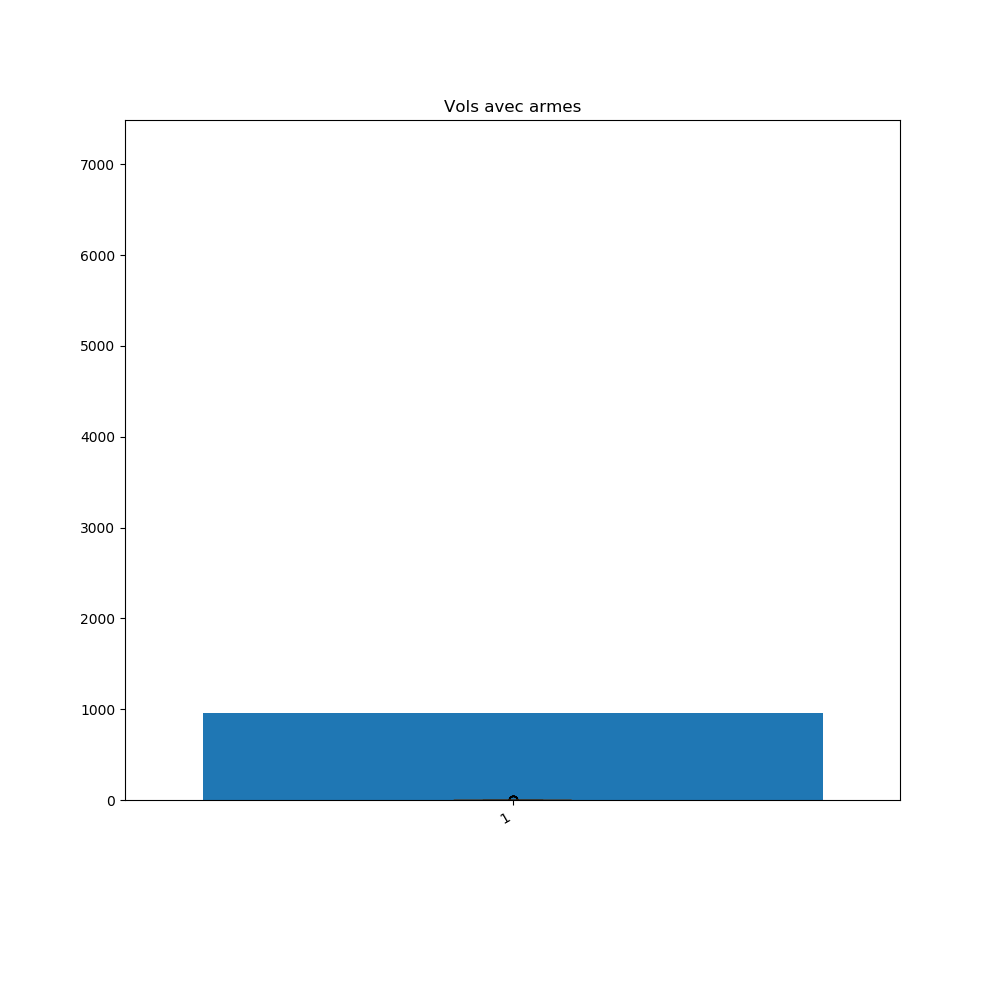

In [203]:
plt.figure(figsize=(10,10))
plt.bar(crimes.columns.drop(['Département','Libellé Département','Population','Nombre de logements','Revenu fiscal moyen','Parti']),crimes0.drop(['Département','Libellé Département','Population','Nombre de logements','Revenu fiscal moyen','Parti'],1).mean())
plt.gcf().autofmt_xdate()

<IPython.core.display.Javascript object>


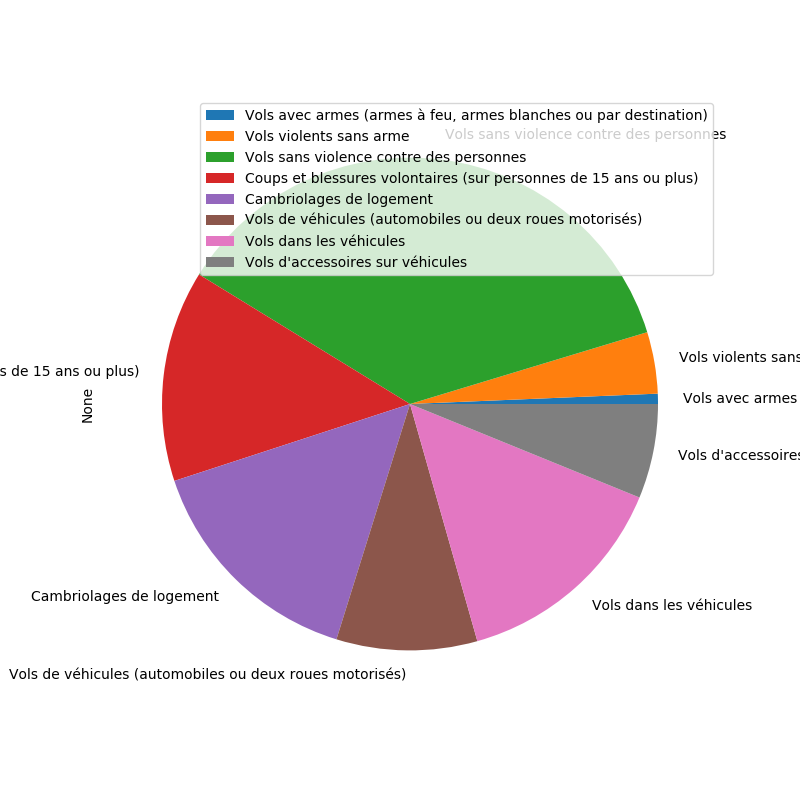

In [204]:
plt.figure(figsize=(8,8))
crimes.drop(['Population','Nombre de logements','Revenu fiscal moyen'],1).mean().plot(kind='pie')
plt.legend(loc='best')

## Analyse Univariée :

### Cambriolages de logement :

In [124]:
stats_ord = crimes['Cambriolages de logement'].sort_values()

In [205]:
stats_ord.describe()

count    100.000000
mean       8.203586
std        6.050386
min        3.541188
25%        5.508510
50%        7.039149
75%        8.800941
max       59.462855
Name: Vols sans violence contre des personnes, dtype: float64

In [206]:
n = crimes['Cambriolages de logement'].count()
q1 = stats_ord.iloc[int(np.ceil(0.25*n)-1)]
median  = stats_ord.iloc[int(np.ceil(0.5*n)-1)]
q3 = stats_ord.iloc[int(np.ceil(0.75*n)-1)]
print("premiere quartile = {}".format(q1))
print("mediane = {}".format(median))
print("deuxieme quartile = {}".format(q3))

premiere quartile = 5.428026850087014
mediane = 7.025593900182548
deuxieme quartile = 8.71844592264597


À partir des quartiles, nous pouvons calculer l'écart interquartile:

In [207]:
q3-q1

3.2904190725589553

L'écart interquartile, qui est une statistique de dispersion, vaut environ  **1.9**

<IPython.core.display.Javascript object>


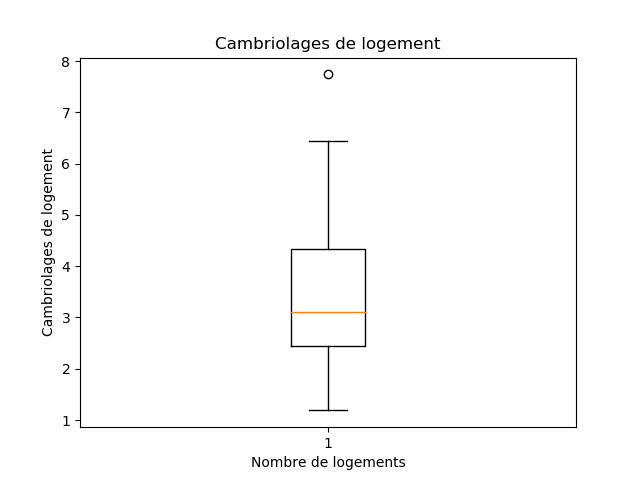

Text(0.5,1,'Cambriolages de logement')

In [208]:
plt.figure()
plt.boxplot(crimes['Cambriolages de logement'])
plt.title('Cambriolages de logement')

In [129]:
crimes['Cambriolages de logement'].var(ddof=0)

1.6037543161906418

La distribution conditionnelle de la variable **Cambriolages de logement** sachant que la variable population est moins que 500k :

In [209]:
a0 = crimes.loc[crimes['Population']<=5e5,'Cambriolages de logement']
print('Sa moyenne vaut {}'.format(a0.mean()))
print('Sa variannce vaut {}'.format(a0.var(ddof=0)))

Sa moyenne vaut 3.1135930125225357
Sa variannce vaut 1.43493958395316


La distribution conditionnelle de la variable **Cambriolages de logement** sachant que la variable population est entre 500k et 1M

In [210]:
a1 = crimes.loc[(crimes['Population']>5e5)&(crimes['Population']<=1e6),'Cambriolages de logement']

print('Sa moyenne vaut {}'.format(a2.mean()))
print('Sa variannce vaut {}'.format(a2.var(ddof=0)))

Sa moyenne vaut 0.07804676600277126
Sa variannce vaut 0.005277727602730701


La distribution conditionnelle de la variable **Cambriolages de logement** sachant que la variable population est entre 1M et 1.5M :

In [211]:
a2 = crimes.loc[(crimes['Population']>1e6)&(crimes['Population']<=1.5e6),'Cambriolages de logement']

print('Sa moyenne vaut {}'.format(a2.mean()))
print('Sa variannce vaut {}'.format(a2.var(ddof=0)))

Sa moyenne vaut 4.271471782169953
Sa variannce vaut 2.1639992867023468


La distribution conditionnelle de la variable **Cambriolages de logement** sachant que la variable population est entre 1.5M et 2M :

In [212]:
a3 = crimes.loc[(crimes['Population']>1.5e6)&(crimes['Population']<=2e6),'Cambriolages de logement']
print('Sa moyenne vaut {}'.format(a3.mean()))
print('Sa variannce vaut {}'.format(a3.var(ddof=0)))
a3

Sa moyenne vaut 4.629011380785568
Sa variannce vaut 0.7252238369137616


33    4.457358
69    5.718456
92    3.375329
93    4.964902
Name: Cambriolages de logement, dtype: float64

<IPython.core.display.Javascript object>


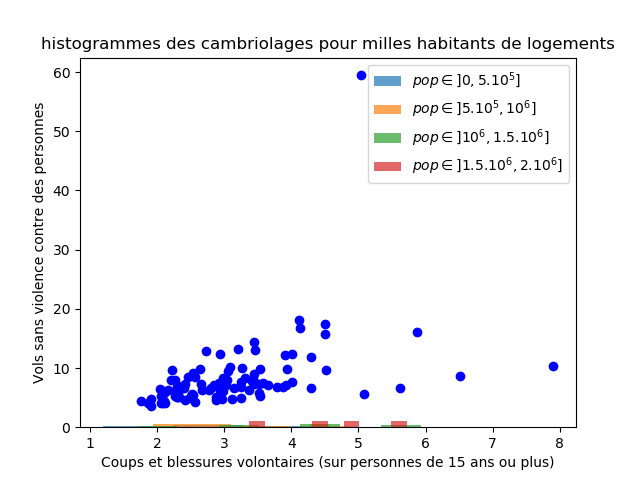

C:\Users\Mohamed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'histogrammes des cambriolages pour milles habitants de logements')

In [213]:
plt.figure()
plt.hist(a0,normed=True,alpha=0.7,label='$pop \in {]}0,5.10^5]$')
plt.hist(a1,normed=True,alpha=0.7,label='$pop \in {]}5.10^5,10^6]$')
plt.hist(a2,normed=True,alpha=0.7,label='$pop \in {]}10^6,1.5.10^6]$')
plt.hist(a3,normed=True,alpha=0.7,label='$pop \in {]}1.5.10^6,2.10^6]$')
plt.legend(loc= 0)
plt.title('histogrammes des cambriolages pour milles habitants de logements')

### Vols avec armes :

In [214]:
stats_ord = crimes['Vols avec armes (armes à feu, armes blanches ou par destination)'].sort_values()

In [215]:
stats_ord.describe()

count    100.000000
mean       0.150614
std        0.377639
min        0.011518
25%        0.043200
50%        0.070146
75%        0.121092
max        3.035611
Name: Vols avec armes (armes à feu, armes blanches ou par destination), dtype: float64

In [216]:
n = crimes['Vols avec armes (armes à feu, armes blanches ou par destination)'].count()
q1 = stats_ord.iloc[int(np.ceil(0.25*n)-1)]
median  = stats_ord.iloc[int(np.ceil(0.5*n)-1)]
q3 = stats_ord.iloc[int(np.ceil(0.75*n)-1)]
print("premiere quartile = {}".format(q1))
print("mediane = {}".format(median))
print("deuxieme quartile = {}".format(q3))

premiere quartile = 0.04176891348613794
mediane = 0.06852211175120791
deuxieme quartile = 0.12039028340967171


l'écart interquartile :

In [217]:
q3-q1

0.07862136992353377

In [218]:
plt.figure(1)
plt.boxplot(crimes['Vols avec armes (armes à feu, armes blanches ou par destination)'])
plt.title('Vols avec armes')

Text(0.5,1,'Vols avec armes')

In [219]:
crimes['Vols avec armes (armes à feu, armes blanches ou par destination)'].var(ddof=0)

0.14118511128780006

<IPython.core.display.Javascript object>


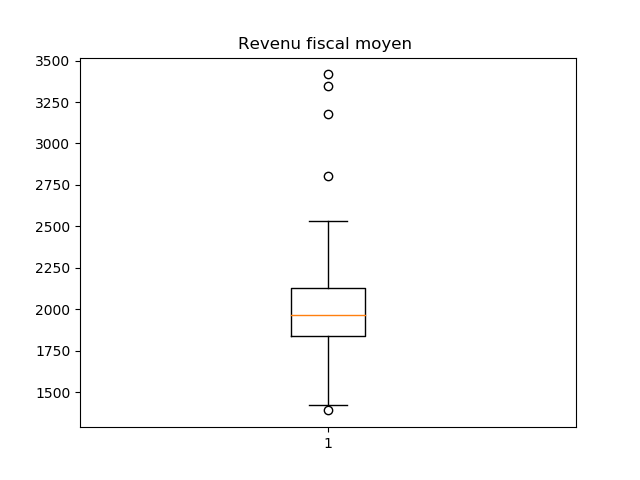

Text(0.5,1,'Revenu fiscal moyen ')

In [220]:
plt.figure()
plt.boxplot(crimes['Revenu fiscal moyen'])
plt.title('Revenu fiscal moyen ')

<IPython.core.display.Javascript object>


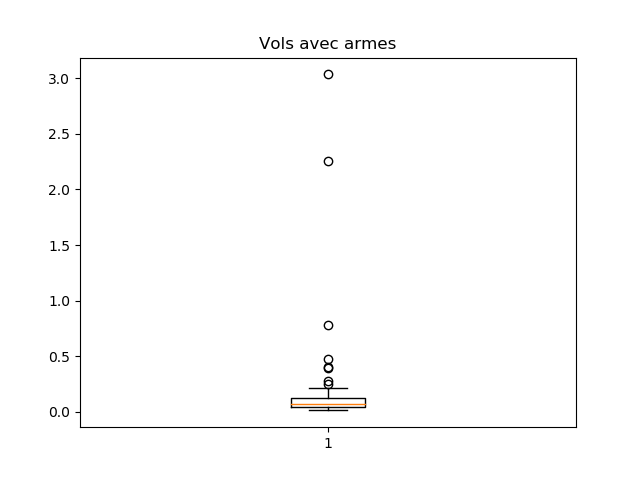

Text(0.5,1,'Vols avec armes')

In [142]:
plt.figure()
plt.boxplot(crimes['Vols avec armes (armes à feu, armes blanches ou par destination)'])
plt.title('Vols avec armes')

In [221]:
crimes['Revenu fiscal moyen'].describe()

count     100.000000
mean     2019.270000
std       322.334974
min      1389.000000
25%      1838.250000
50%      1965.500000
75%      2128.250000
max      3417.000000
Name: Revenu fiscal moyen, dtype: float64

In [222]:
crimes['Vols sans violence contre des personnes'].var(ddof=0)

36.241098145229785

La distribution conditionnelle de la variable **Vols avec armes** sachant que la variable Revenu fiscal moyen est moins que 1838euros :

In [223]:
a0 = crimes.loc[crimes['Revenu fiscal moyen']<=1838.25,'Vols avec armes (armes à feu, armes blanches ou par destination)']
print('Sa moyenne vaut {}'.format(a0.mean()))
print('Sa variannce vaut {}'.format(a0.var(ddof=0)))

Sa moyenne vaut 0.31070258264741685
Sa variannce vaut 0.5136159013823791


La distribution conditionnelle de la variable **Vols avec armes** sachant que la variable Revenu fiscal moyen est entre 1838euros et 1965euros :

In [224]:
a1 = crimes.loc[(crimes['Revenu fiscal moyen']>1838.25)&(crimes['Revenu fiscal moyen']<=1965.5),'Vols avec armes (armes à feu, armes blanches ou par destination)']
print('Sa moyenne vaut {}'.format(a1.mean()))
print('Sa variannce vaut {}'.format(a1.var(ddof=0)))

Sa moyenne vaut 0.07126395502128652
Sa variannce vaut 0.001976727281994053


La distribution conditionnelle de la variable **Vols avec armes** sachant que la variable Revenu fiscal moyen est entre 1965euros et 2128euros :

In [225]:
a2 = crimes.loc[(crimes['Revenu fiscal moyen']>1965.5)&(crimes['Revenu fiscal moyen']<=2128.25),'Vols avec armes (armes à feu, armes blanches ou par destination)']
print('Sa moyenne vaut {}'.format(a2.mean()))
print('Sa variannce vaut {}'.format(a2.var(ddof=0)))

Sa moyenne vaut 0.07804676600277126
Sa variannce vaut 0.005277727602730701


La distribution conditionnelle de la variable **Vols avec armes** sachant que la variable Revenu fiscal moyen est entre 1838euros et 1965euros :

In [226]:
a3 = crimes.loc[(crimes['Revenu fiscal moyen']>2128.25)&(crimes['Revenu fiscal moyen']<=3417.),'Vols avec armes (armes à feu, armes blanches ou par destination)']
print('Sa moyenne vaut {}'.format(a3.mean()))
print('Sa variannce vaut {}'.format(a3.var(ddof=0)))

Sa moyenne vaut 0.1424439236316233
Sa variannce vaut 0.0066125513544165355


<IPython.core.display.Javascript object>


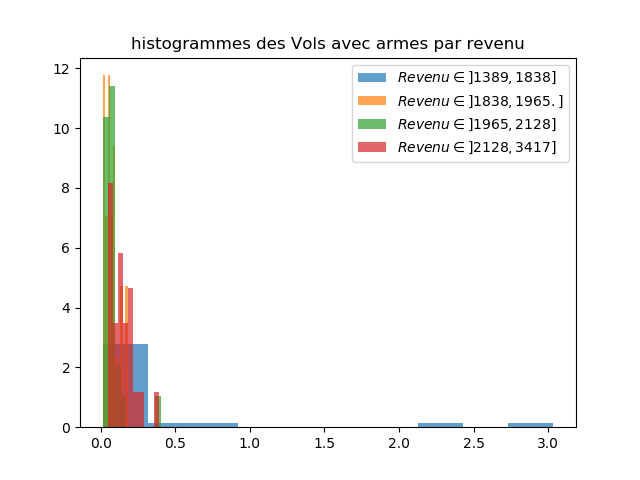

C:\Users\Mohamed\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'histogrammes des Vols avec armes par revenu')

In [227]:
plt.figure()
plt.hist(a0,normed=True,alpha=0.7,label='$Revenu \in {]}1389,1838]$')
plt.hist(a1,normed=True,alpha=0.7,label='$Revenu \in {]}1838,1965.]$')
plt.hist(a2,normed=True,alpha=0.7,label='$Revenu \in {]}1965,2128]$')
plt.hist(a3,normed=True,alpha=0.7,label='$Revenu \in {]}2128,3417]$')
plt.legend(loc= 0)
plt.title('histogrammes des Vols avec armes par revenu')

### Vols sans violence contre des personnes :

In [228]:
stats_ord = crimes['Vols sans violence contre des personnes'].sort_values()

In [229]:
stats_ord.describe()

count    100.000000
mean       8.203586
std        6.050386
min        3.541188
25%        5.508510
50%        7.039149
75%        8.800941
max       59.462855
Name: Vols sans violence contre des personnes, dtype: float64

In [230]:
n = crimes['Vols sans violence contre des personnes'].count()
q1 = stats_ord.iloc[int(np.ceil(0.25*n)-1)]
median  = stats_ord.iloc[int(np.ceil(0.5*n)-1)]
q3 = stats_ord.iloc[int(np.ceil(0.75*n)-1)]
print("premiere quartile = {}".format(q1))
print("mediane = {}".format(median))
print("deuxieme quartile = {}".format(q3))

premiere quartile = 5.428026850087014
mediane = 7.025593900182548
deuxieme quartile = 8.71844592264597


l'écart interquartile :

In [231]:
q3-q1

3.2904190725589553

<IPython.core.display.Javascript object>


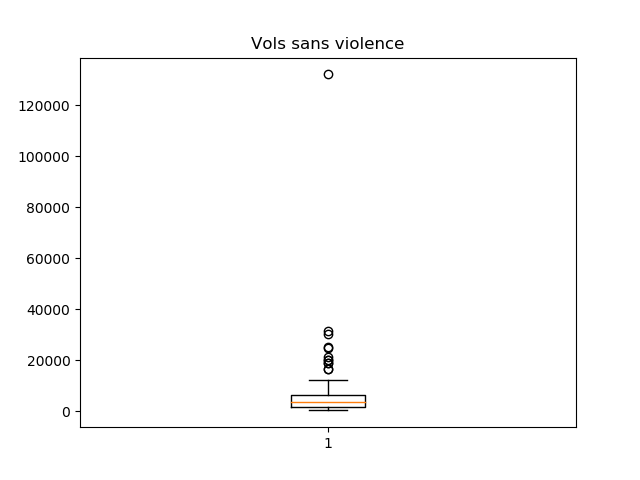

Text(0.5,1,'Vols sans violence')

In [232]:
plt.figure()
plt.boxplot(crimes0['Vols sans violence contre des personnes'])
plt.title('Vols sans violence')

on affiche la moyenne des Vols sans violence contre des personnes groupé par la variable Parti.

<IPython.core.display.Javascript object>


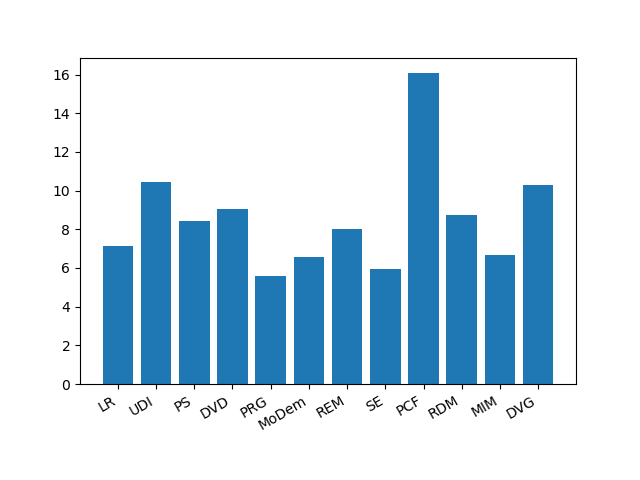

In [233]:
a=[]
for parti in crimes.Parti.unique():
    a.append( crimes.loc[crimes['Parti']==parti,'Vols sans violence contre des personnes'].mean())
plt.figure()
plt.bar(crimes.Parti.unique(),a)
plt.gcf().autofmt_xdate()

On remarque que les départements qui ont parti communiste français comme coleur politique on le plus grands nombre de Vols sans violence contre des personnes par 1000 personnes .

In [234]:
crimes.Parti.value_counts()

LR       40
PS       27
DVD      12
UDI      12
PRG       2
PCF       1
RDM       1
REM       1
MoDem     1
MIM       1
SE        1
DVG       1
Name: Parti, dtype: int64

In [235]:
crimes.loc[crimes.Parti=='PCF','Département']

93    93
Name: Département, dtype: object

## Analyse Bivariée :

In [236]:
plt.figure(3)

plt.plot(crimes['Nombre de logements'],crimes['Cambriolages de logement'],'b o')
plt.xlabel('Nombre de logements')
plt.ylabel('Cambriolages de logement')

Text(55.8472,0.5,'Cambriolages de logement')

In [237]:
plt.figure(4)

plt.plot(crimes['Coups et blessures volontaires (sur personnes de 15 ans ou plus)'],crimes['Vols sans violence contre des personnes'],'b o')
plt.xlabel('Coups et blessures volontaires (sur personnes de 15 ans ou plus)')
plt.ylabel('Vols sans violence contre des personnes')

Text(42.7222,0.5,'Vols sans violence contre des personnes')

<IPython.core.display.Javascript object>


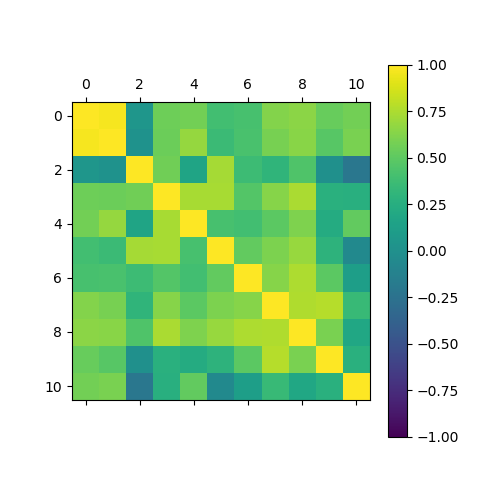

In [238]:
plt.matshow(crimes.corr())
plt.colorbar();
plt.clim(-1, 1);

In [161]:
crimes.corr()

,Population,Nombre de logements,"Vols avec armes (armes à feu, armes blanches ou par destination)",Vols violents sans arme,Vols sans violence contre des personnes,Coups et blessures volontaires (sur personnes de 15 ans ou plus),Cambriolages de logement,Vols de véhicules (automobiles ou deux roues motorisés),Vols dans les véhicules,Vols d'accessoires sur véhicules,Revenu fiscal moyen
Population,1.000000,0.972048,0.050625,0.559877,0.573466,0.398209,0.417217,0.629477,0.653931,0.537269,0.576079
Nombre de logements,0.972048,1.000000,0.019125,0.552616,0.683816,0.364927,0.426481,0.590011,0.645289,0.479185,0.600677
"Vols avec armes (armes à feu, armes blanches ou par destination)",0.050625,0.019125,1.000000,0.568156,0.164157,0.734039,0.368669,0.308582,0.445877,0.004111,-0.209491
Vols violents sans arme,0.559877,0.552616,0.568156,1.000000,0.741617,0.740584,0.467954,0.639058,0.744112,0.267246,0.258477
Vols sans violence contre des personnes,0.573466,0.683816,0.164157,0.741617,1.000000,0.419821,0.396239,0.494817,0.609905,0.229518,0.522428
Coups et blessures volontaires (sur personnes de 15 ans ou plus),0.398209,0.364927,0.734039,0.740584,0.419821,1.000000,0.523403,0.605898,0.692557,0.290932,-0.054196
Cambriolages de logement,0.417217,0.426481,0.368669,0.467954,0.396239,0.523403,1.000000,0.633345,0.755304,0.498155,0.123119
Vols de véhicules (automobiles ou deux roues motorisés),0.629477,0.590011,0.308582,0.639058,0.494817,0.605898,0.633345,1.000000,0.758082,0.774099,0.351439
Vols dans les véhicules,0.653931,0.645289,0.445877,0.744112,0.609905,0.692557,0.755304,0.758082,1.000000,0.595322,0.190349
Vols d'accessoires sur véhicules,0.537269,0.479185,0.004111,0.267246,0.229518,0.290932,0.498155,0.774099,0.595322,1.000000,0.267470


## Stat chi2 :

In [239]:
from scipy.stats import chi2

In [240]:
def dist_chi2_parti (Parti, var):
    n = var.count()
    Parti = Parti[~var.isnull()]
    var = var.dropna()
    
    n_1 = (Parti=='LR').sum()
    n_2 = (Parti=='UDI').sum()
    n_3 = (Parti=='PS').sum()
    n_4 = (Parti=='DVD').sum()
    n_5 = (Parti=='PRG').sum()
    n_6 = (Parti=='MoDem').sum()
    n_7 = (Parti=='REM').sum()
    n_8 = (Parti=='SE').sum()
    n_9 = (Parti=='PCF').sum()
    n_10 = (Parti=='RDM').sum()
    n_11 = (Parti=='MIM').sum()
    n_12 = (Parti=='DVG').sum()

    var_values = np.sort(var[~var.isnull()].unique())
    
    N = len(var_values)
    nb_LR = []
    nb_UDI = []
    nb_PS = []
    nb_DVD = []
    nb_PRG = []
    nb_MoDem = []
    nb_REM = []
    nb_SE = []
    nb_PCF = []
    nb_RDM = []
    nb_MIM = []
    nb_DVG = []
    
    m = []
    N = len(var_values)
    for i in range(N):
        m.append((var==var_values[i]).sum())
        nb_LR.append((var[Parti=='LR']==var_values[i]).sum())
        nb_UDI.append((var[Parti=='UDI']==var_values[i]).sum())
        nb_PS.append((var[Parti=='PS']==var_values[i]).sum())
        nb_DVD.append((var[Parti=='DVD']==var_values[i]).sum())
        nb_PRG.append((var[Parti=='PRG']==var_values[i]).sum())
        nb_MoDem.append((var[Parti=='MoDem']==var_values[i]).sum())
        nb_REM.append((var[Parti=='REM']==var_values[i]).sum())
        nb_SE.append((var[Parti=='SE']==var_values[i]).sum())
        nb_PCF.append((var[Parti=='PCF']==var_values[i]).sum())
        nb_RDM.append((var[Parti=='RDM']==var_values[i]).sum())
        nb_MIM.append((var[Parti=='MIM']==var_values[i]).sum())
        nb_DVG.append((var[Parti=='DVG']==var_values[i]).sum())

    chi2_stat = 0
    for i in range(N):
        chi2_stat += ((n*nb_LR[i]-n_1*m[i])**2)/float(n_1*m[i])
        chi2_stat += ((n*nb_UDI[i]-n_2*m[i]) ** 2)/float(n_2*m[i])
        chi2_stat += ((n*nb_PS[i]-n_2*m[i]) ** 2)/float(n_3*m[i])
        chi2_stat += ((n*nb_DVD[i]-n_2*m[i]) ** 2)/float(n_4*m[i])
        chi2_stat += ((n*nb_PRG[i]-n_2*m[i]) ** 2)/float(n_5*m[i])
        chi2_stat += ((n*nb_MoDem[i]-n_2*m[i]) ** 2)/float(n_6*m[i])
        chi2_stat += ((n*nb_REM[i]-n_2*m[i]) ** 2)/float(n_7*m[i])
        chi2_stat += ((n*nb_SE[i]-n_2*m[i]) ** 2)/float(n_8*m[i])
        chi2_stat += ((n*nb_PCF[i]-n_2*m[i]) ** 2)/float(n_9*m[i])
        chi2_stat += ((n*nb_RDM[i]-n_2*m[i]) ** 2)/float(n_10*m[i])
        chi2_stat += ((n*nb_MIM[i]-n_2*m[i]) ** 2)/float(n_11*m[i])
        chi2_stat += ((n*nb_DVG[i]-n_2*m[i]) ** 2)/float(n_12*m[i])
        
    
    chi2_stat /= n
    
    p_value = 1-chi2.cdf(chi2_stat,N-1)
    
    return (chi2_stat,p_value)

In [241]:
dist_chi2_parti(crimes['Parti'],crimes['Revenu fiscal moyen'])

(1902.3549382716053, 0.0)

In [242]:
for delits in crimes0.columns.drop(['Département','Libellé Département','Population','Parti','Nombre de logements']):
    print(delits,':', dist_chi2_parti(crimes0['Parti'],crimes0[delits]))

Vols avec armes (armes à feu, armes blanches ou par destination) : (1803.805555555556, 0.0)
Vols violents sans arme : (1999.1296296296305, 0.0)
Vols sans violence contre des personnes : (1999.3148148148157, 0.0)
Coups et blessures volontaires (sur personnes de 15 ans ou plus) : (1999.12962962963, 0.0)
Cambriolages de logement : (2005.333333333333, 0.0)
Vols de véhicules (automobiles ou deux roues motorisés) : (2005.3333333333344, 0.0)
Vols dans les véhicules : (1999.9166666666674, 0.0)
Vols d'accessoires sur véhicules : (1948.0648148148155, 0.0)
Revenu fiscal moyen : (1902.3549382716053, 0.0)


Pour chacune de ces variables , on observe une p_value inférieur à 0.05. Donc on peut conclure que la variable Parti est liée à chacune de ces variables.

In [243]:
def variances_F(parti, variable):
    variable_values = np.sort(variable[np.logical_not(variable.isnull())].unique())
    parti_values = crimes.Parti.unique()
    freq_parti =[]
    variance_intra=0
    variance_inter=0
    
    for parti_ in crimes.Parti.unique():
        
        freq_parti.append(np.sum(parti==parti_)/float(parti.count()))
    
    for i,parti_ in enumerate(parti_values):
                          
        variance_intra += variable[parti==parti_].var()*freq_parti[i]
        
    for i,parti_ in enumerate(parti_values):
 
                          
        variance_inter += np.power(variable[parti==parti_].mean()-variable.mean(),2.)*freq_parti[i]
    
    F = (variable.count()-1)*(variance_inter/variance_intra)
    
    return variance_intra, variance_inter, F

In [244]:
for delits in crimes.columns.drop(['Département','Libellé Département','Population','Parti','Nombre de logements']):
    print(delits,':', variances_F(crimes['Parti'],crimes[delits]))

Vols avec armes (armes à feu, armes blanches ou par destination) : (nan, 0.13653978907320666, nan)
Vols violents sans arme : (nan, 0.7919999444192323, nan)
Vols sans violence contre des personnes : (nan, 2.0699568515784166, nan)
Coups et blessures volontaires (sur personnes de 15 ans ou plus) : (nan, 0.5478846789695612, nan)
Cambriolages de logement : (nan, 0.2768303344131853, nan)
Vols de véhicules (automobiles ou deux roues motorisés) : (nan, 0.14299326335866916, nan)
Vols dans les véhicules : (nan, 0.8047166738302622, nan)
Vols d'accessoires sur véhicules : (nan, 0.052469350337908484, nan)
Revenu fiscal moyen : (nan, 16362.422266666666, nan)


affichage des nuages de points avec la variable Revenu fiscal moyen et les autres délits :

<IPython.core.display.Javascript object>


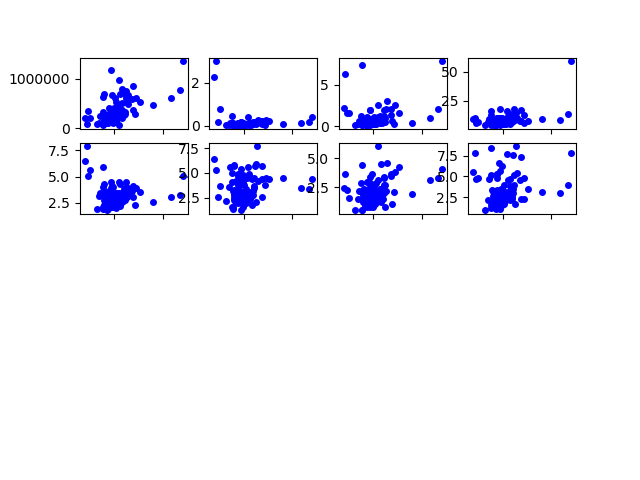

In [245]:
plt.figure()
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.plot(crimes['Revenu fiscal moyen'],crimes[crimes.columns[i+3]],'ob',markersize=4)
    plt.gcf().autofmt_xdate()

On remarque que y'a une correlation positif entre la variable Revenu et tous les délits , mais moins importante pour Vols sans violence contre des personnes et Coups et blessures volontaires (sur personnes de 15 ans ou plus).

# Analyse Multivariée (ACP) :

In [246]:
from sklearn.decomposition import PCA

## Normalisation des données :

In [247]:
crimes[['Population',
       'Nombre de logements',
       'Vols avec armes (armes à feu, armes blanches ou par destination)',
       'Vols violents sans arme', 'Vols sans violence contre des personnes',
       'Coups et blessures volontaires (sur personnes de 15 ans ou plus)',
       'Cambriolages de logement',
       'Vols de véhicules (automobiles ou deux roues motorisés)',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules",'Revenu fiscal moyen'] ]=(crimes[['Population',
       'Nombre de logements',
       'Vols avec armes (armes à feu, armes blanches ou par destination)',
       'Vols violents sans arme', 'Vols sans violence contre des personnes',
       'Coups et blessures volontaires (sur personnes de 15 ans ou plus)',
       'Cambriolages de logement',
       'Vols de véhicules (automobiles ou deux roues motorisés)',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules", 'Revenu fiscal moyen' ]]-crimes[['Population',
       'Nombre de logements',
       'Vols avec armes (armes à feu, armes blanches ou par destination)',
       'Vols violents sans arme', 'Vols sans violence contre des personnes',
       'Coups et blessures volontaires (sur personnes de 15 ans ou plus)',
       'Cambriolages de logement',
       'Vols de véhicules (automobiles ou deux roues motorisés)',
       'Vols dans les véhicules', "Vols d'accessoires sur véhicules", 'Revenu fiscal moyen' ]].mean())/crimes.std()

In [255]:
sklearn_pca = PCA() 
crimes_pca = sklearn_pca.fit_transform(crimes.drop(['Département','Libellé Département','Parti'],1))  

<IPython.core.display.Javascript object>


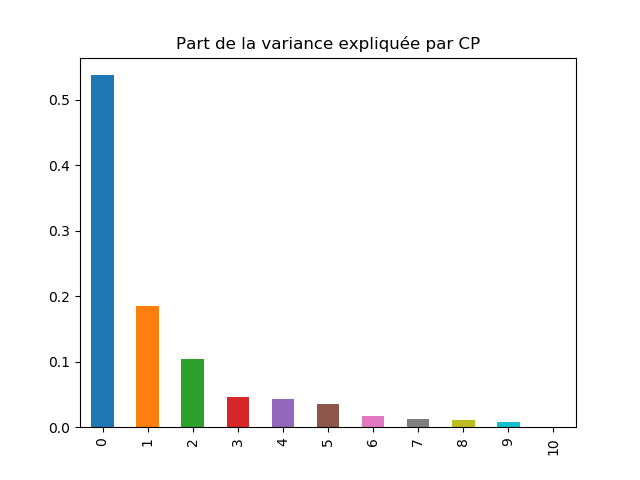

array([0.53760504, 0.18479201, 0.10459855, 0.04666679, 0.04297715,
       0.03525904, 0.01643184, 0.01300055, 0.01032321, 0.00765486,
       0.00069096])

In [257]:
plt.figure()
scree = pd.Series(sklearn_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")
sklearn_pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


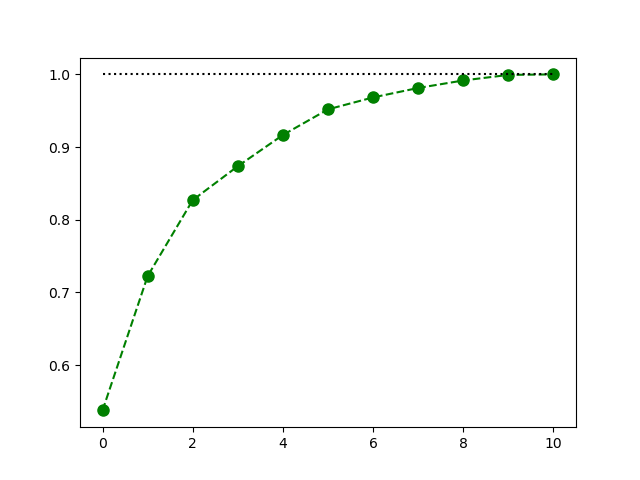

In [258]:
plt.figure()
cum = scree.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=8, color='green')
plt.plot(range(cum.size),np.ones(cum.size),':',  color='black')

Le graphique des parts cumulées de variance expliquée par les CP montre que la quasi-totalité de la variabilité dans les données est capturée par les cinqs premières CP (supérieur à 90%). 

In [251]:
def myPCA(df):
	# Normalize data
	df_norm = (df - df.mean()) / df.std()
	# PCA
	pca = PCA()
	pca_res = pca.fit_transform(df_norm.values)
	# Ebouli
	ebouli = pd.Series(pca.explained_variance_ratio_)
	coef = np.transpose(pca.components_)
	cols = ['PC-'+str(x) for x in range(len(ebouli))]
	pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
	return pc_infos, ebouli  

def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

<IPython.core.display.Javascript object>


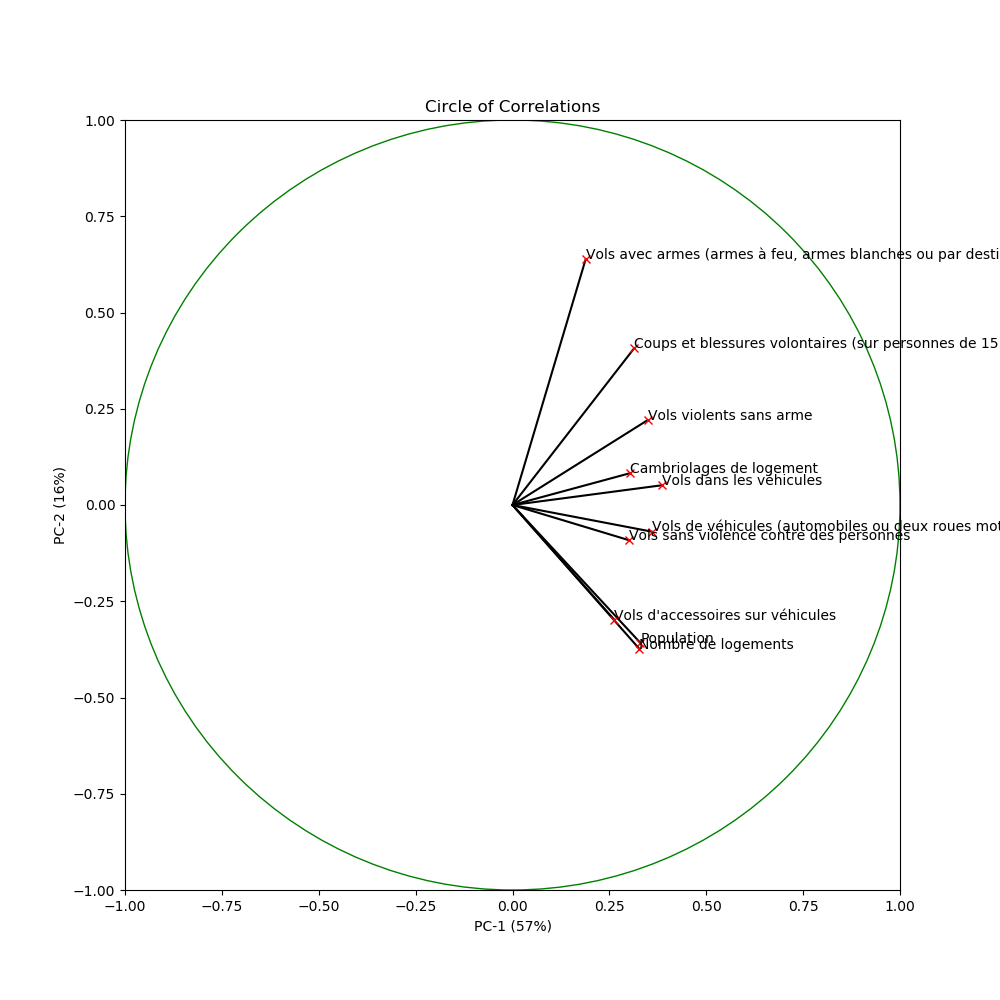

In [259]:
plt.figure(figsize=(10,10))
pc_infos, ebouli = myPCA(crimes.drop(['Département','Libellé Département','Parti','Revenu fiscal moyen'],1))
circleOfCorrelations(pc_infos, ebouli)

<IPython.core.display.Javascript object>


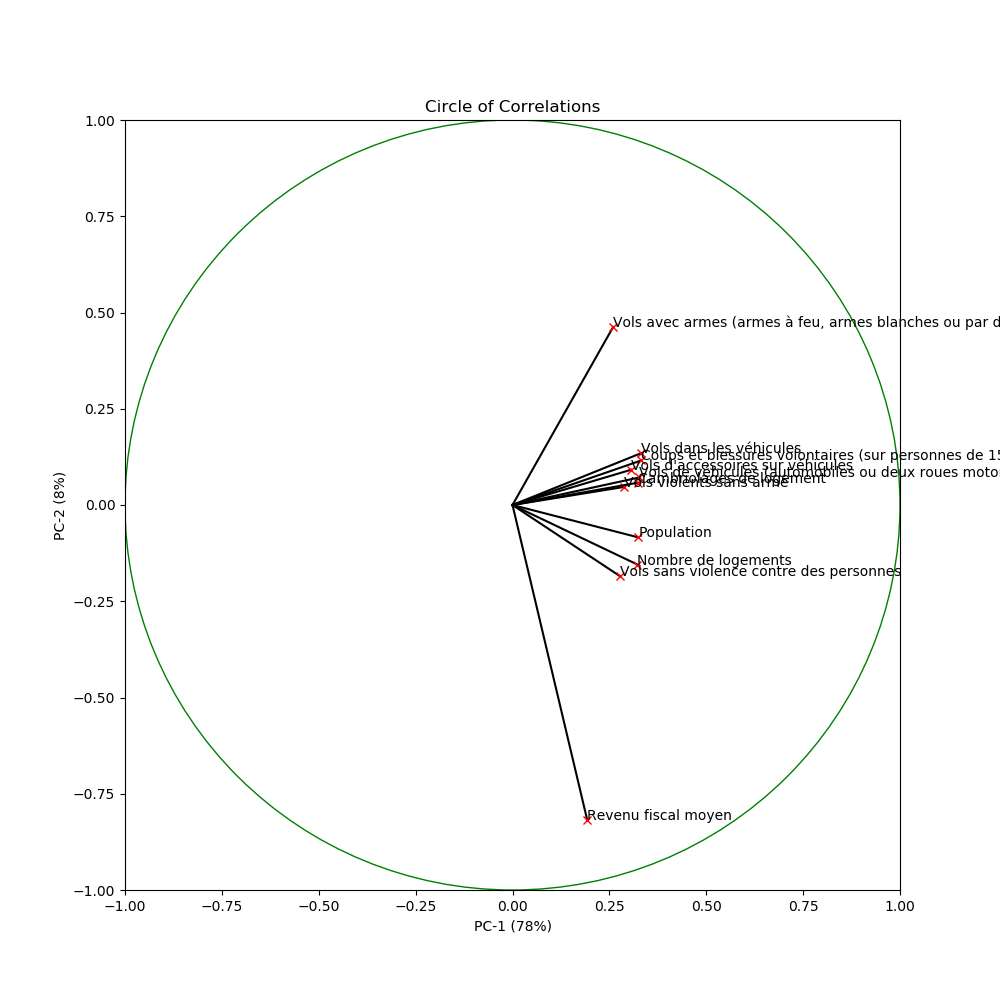

In [175]:
plt.figure(figsize=(10,10))
pc_infos, ebouli = myPCA(crimes0.drop(['Département','Libellé Département','Parti'],1))
circleOfCorrelations(pc_infos, ebouli)

<IPython.core.display.Javascript object>


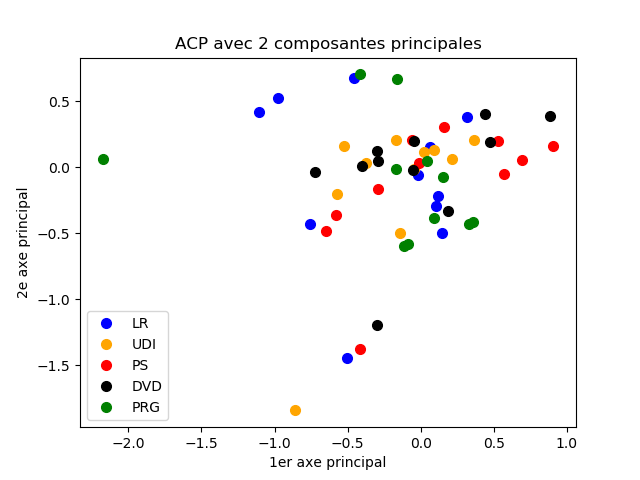

In [260]:
plt.figure()


for parti,col in zip(crimes['Parti'].unique(),['blue','orange','red','black','green','purple','pink','brown','gray','olive','cyan','yellow']):
    if len(crimes_pca[(crimes['Parti']==parti)])>=2:
        plt.plot(crimes_pca[(crimes['Parti']==parti)][0],crimes_pca[(crimes['Parti']==parti)][1],'o', markersize=7,color=col, label=parti)

    plt.xlabel('1er axe principal')
    plt.ylabel('2e axe principal')
    plt.legend(loc='best')
    plt.title('ACP avec 2 composantes principales')

On voit que y'a que 5 Partis politique qui peuvent s'exprimer en fonction des deux composantes principales les plus importantes. 